**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
suppressMessages(suppressWarnings(library("DESeq2")))
show_env()

You are working on        Singularity 
BASE DIRECTORY (FD_BASE): /mount 
REPO DIRECTORY (FD_REPO): /mount/repo 
WORK DIRECTORY (FD_WORK): /mount/work 
DATA DIRECTORY (FD_DATA): /mount/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /mount/repo/Proj_CombEffect_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /mount/repo/Proj_CombEffect_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /mount/repo/Proj_CombEffect_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /mount/repo/Proj_CombEffect_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /mount/repo/Proj_CombEffect_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /mount/repo/Proj_CombEffect_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /mount/repo/Proj_CombEffect_ENCODE_FCC/log 
PROJECT APP     (FD_APP): /mount/repo/Proj_CombEffect_ENCODE_FCC/app 
PROJECT REF     (FD_REF): /mount/repo/Proj_CombEffect_ENCODE_FCC/references 



## Import count matrix and metadata

In [2]:
### init
TXT_ASSAY  = "STARR_ATAC_K562_Reddy_KS91"

In [3]:
### set directory
txt_fdiry = file.path(FD_RES, "assay_fcc", TXT_ASSAY, "fragment_counts", "summary")
txt_fname = "metadata.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

### read table
dat = read_tsv(txt_fpath, show_col_types = FALSE)

### assign and show
dat_metadata_astarr = dat
fun_display_table(dat)

FName,Assay,Prefix,Group,Sample
ASTARRseq_K562_KS91.hg38.Input.rep1.WGS.unstranded.bed.gz,STARR_ATAC_K562_Reddy_KS91,ASTARRseq_K562_KS91,Input,Input.rep1
ASTARRseq_K562_KS91.hg38.Input.rep2.WGS.unstranded.bed.gz,STARR_ATAC_K562_Reddy_KS91,ASTARRseq_K562_KS91,Input,Input.rep2
ASTARRseq_K562_KS91.hg38.Input.rep3.WGS.unstranded.bed.gz,STARR_ATAC_K562_Reddy_KS91,ASTARRseq_K562_KS91,Input,Input.rep3
ASTARRseq_K562_KS91.hg38.Input.rep4.WGS.unstranded.bed.gz,STARR_ATAC_K562_Reddy_KS91,ASTARRseq_K562_KS91,Input,Input.rep4
ASTARRseq_K562_KS91.hg38.Input.rep5.WGS.unstranded.bed.gz,STARR_ATAC_K562_Reddy_KS91,ASTARRseq_K562_KS91,Input,Input.rep5
ASTARRseq_K562_KS91.hg38.Input.rep6.WGS.unstranded.bed.gz,STARR_ATAC_K562_Reddy_KS91,ASTARRseq_K562_KS91,Input,Input.rep6
ASTARRseq_K562_KS91.hg38.Output.rep1.WGS.unstranded.bed.gz,STARR_ATAC_K562_Reddy_KS91,ASTARRseq_K562_KS91,Output,Output.rep1
ASTARRseq_K562_KS91.hg38.Output.rep2.WGS.unstranded.bed.gz,STARR_ATAC_K562_Reddy_KS91,ASTARRseq_K562_KS91,Output,Output.rep2
ASTARRseq_K562_KS91.hg38.Output.rep3.WGS.unstranded.bed.gz,STARR_ATAC_K562_Reddy_KS91,ASTARRseq_K562_KS91,Output,Output.rep3
ASTARRseq_K562_KS91.hg38.Output.rep4.WGS.unstranded.bed.gz,STARR_ATAC_K562_Reddy_KS91,ASTARRseq_K562_KS91,Output,Output.rep4


**import region metadata**

In [4]:
txt_fdiry = file.path(FD_RES, "region", "summary")
txt_fname = "metadata_region_label.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_metadata_region = dat
print(dim(dat))
fun_display_table(dat)

[1] 8 3


Folder,FName,Label
encode_open_chromatin,K562.hg38.ENCSR000EKS.ENCFF274YGF.DNase.bed.gz,dnase_ENCFF274YGF
encode_open_chromatin,K562.hg38.ENCSR000EOT.ENCFF185XRG.DNase.bed.gz,dnase_ENCFF185XRG
encode_open_chromatin,K562.hg38.ENCSR483RKN.ENCFF558BLC.ATAC.bed.gz,atac_ENCFF558BLC
encode_open_chromatin,K562.hg38.ENCSR483RKN.ENCFF925CYR.ATAC.bed.gz,atac_ENCFF925CYR
encode_open_chromatin,K562.hg38.ENCSR868FGK.ENCFF333TAT.ATAC.bed.gz,atac_ENCFF333TAT
encode_open_chromatin,K562.hg38.ENCSR868FGK.ENCFF948AFM.ATAC.bed.gz,atac_ENCFF948AFM
fcc_astarr_macs,ASTARRseq_K562_KS91.hg38.Input.rep_all.max_overlaps.q5.bed,astarr_macs_input_overlap
fcc_astarr_macs,ASTARRseq_K562_KS91.hg38.Input.rep_all.union.q5.bed,astarr_macs_input_union


**create region list for looping**

In [5]:
dat = dat_metadata_region
lst = split(dat$Label, dat$Folder)

lst_metadata_region = lst
print(lst)

$encode_open_chromatin
[1] "dnase_ENCFF274YGF" "dnase_ENCFF185XRG" "atac_ENCFF558BLC" 
[4] "atac_ENCFF925CYR"  "atac_ENCFF333TAT"  "atac_ENCFF948AFM" 

$fcc_astarr_macs
[1] "astarr_macs_input_overlap" "astarr_macs_input_union"  



In [6]:
txt_fdiry = file.path(FD_RES, "assay_fcc", TXT_ASSAY, "coverage")
dir(txt_fdiry)

[1] "encode_open_chromatin" "fcc_astarr_macs"

In [9]:
###
#lst_region = lst_metadata_region["fcc_astarr_macs"]
#lst_region = list("fcc_astarr_macs" = "astarr_macs_input_union")
lst_region = lst_metadata_region
dat_meta   = dat_metadata_astarr

for (txt_folder in names(lst_region)){
    
    ###
    vec_txt_label = lst_region[[txt_folder]]

    ###
    for (txt_label in vec_txt_label){
        
        ###
        cat("====================", "\n")
        cat("Region Folder:", txt_folder, "\n")
        cat("Region Label: ", txt_label,  "\n")
        flush.console()
        
        ###
        txt_fdiry = file.path(FD_RES, "assay_fcc", TXT_ASSAY, "coverage", txt_folder, txt_label, "summary")
        txt_fname = "matrix.raw.count.WGS.tsv"
        txt_fpath = file.path(txt_fdiry, txt_fname)

        dat = read_tsv(txt_fpath, show_col_types = FALSE)
        print(dim(dat))
        flush.console()
        
        ###
        fun_display_table(head(dat))
        flush.console()
    }
}

Region Folder: encode_open_chromatin 
Region Label:  dnase_ENCFF274YGF 
[1] 118721     11


Region,Input.rep1,Input.rep2,Input.rep3,Input.rep4,Input.rep5,Input.rep6,Output.rep1,Output.rep2,Output.rep3,Output.rep4
chr1:181400-181530,166,229,227,218,220,180,7,11,16,8
chr1:778660-778800,3014,3520,3601,3482,3447,3189,1937,2413,2644,4819
chr1:779137-779200,1137,1390,1465,1383,1383,1268,84,128,182,343
chr1:827460-827554,2402,2947,3119,2971,2918,2721,636,717,820,1657
chr1:842880-843060,448,526,566,547,510,471,99,190,217,284
chr1:869800-869980,880,1034,1068,1034,994,935,46,38,51,105


Region Folder: encode_open_chromatin 
Region Label:  dnase_ENCFF185XRG 
[1] 159277     11


Region,Input.rep1,Input.rep2,Input.rep3,Input.rep4,Input.rep5,Input.rep6,Output.rep1,Output.rep2,Output.rep3,Output.rep4
chr1:139369-139421,115,169,181,161,174,156,11,20,22,69
chr1:180800-180871,34,41,42,30,38,33,0,1,0,3
chr1:181108-181200,113,146,151,145,149,119,1,4,2,5
chr1:181400-181560,177,243,244,235,226,190,6,12,16,7
chr1:186785-186839,63,90,89,92,82,86,0,6,9,8
chr1:186980-187129,81,113,103,121,122,100,5,19,24,14


Region Folder: encode_open_chromatin 
Region Label:  atac_ENCFF558BLC 
[1] 107082     11


Region,Input.rep1,Input.rep2,Input.rep3,Input.rep4,Input.rep5,Input.rep6,Output.rep1,Output.rep2,Output.rep3,Output.rep4
chr1:10509-10674,21,34,35,24,37,36,0,0,2,0
chr1:41987-42385,0,0,0,0,0,1,0,0,0,0
chr1:46755-47025,0,0,0,1,0,1,0,0,0,0
chr1:68969-69964,24,29,20,25,23,19,0,0,0,5
chr1:78951-79407,21,30,42,34,35,28,0,5,4,4
chr1:778328-779235,7262,8508,8751,8406,8362,7792,2566,3646,3941,7268


Region Folder: encode_open_chromatin 
Region Label:  atac_ENCFF925CYR 
[1] 51861    11


Region,Input.rep1,Input.rep2,Input.rep3,Input.rep4,Input.rep5,Input.rep6,Output.rep1,Output.rep2,Output.rep3,Output.rep4
chr1:778328-779235,7262,8508,8751,8406,8362,7792,2566,3646,3941,7268
chr1:817237-818202,295,405,437,409,385,360,24,57,35,71
chr1:826647-828124,4835,5959,6230,5947,5845,5510,766,939,1086,2104
chr1:842282-843322,1119,1395,1520,1449,1372,1227,162,322,329,459
chr1:869581-870256,1510,1744,1818,1771,1743,1639,89,93,136,286
chr1:898813-899211,244,276,331,318,285,283,54,68,74,135


Region Folder: encode_open_chromatin 
Region Label:  atac_ENCFF333TAT 
[1] 161693     11


Region,Input.rep1,Input.rep2,Input.rep3,Input.rep4,Input.rep5,Input.rep6,Output.rep1,Output.rep2,Output.rep3,Output.rep4
chr1:40649-41403,1,0,2,1,1,1,1,0,0,0
chr1:41475-41713,0,0,0,0,0,0,0,0,0,0
chr1:42030-42399,0,0,0,0,0,1,0,0,0,0
chr1:46255-47025,4,4,4,4,3,3,0,0,0,0
chr1:67629-67864,0,0,1,0,0,0,0,0,0,0
chr1:68056-68341,1,2,2,0,1,1,0,0,0,3


Region Folder: encode_open_chromatin 
Region Label:  atac_ENCFF948AFM 
[1] 90015    11


Region,Input.rep1,Input.rep2,Input.rep3,Input.rep4,Input.rep5,Input.rep6,Output.rep1,Output.rep2,Output.rep3,Output.rep4
chr1:42030-42399,0,0,0,0,0,1,0,0,0,0
chr1:68963-70035,24,29,20,25,23,19,0,0,0,5
chr1:79151-79653,24,30,43,33,32,38,0,9,11,3
chr1:778339-779268,7304,8576,8809,8458,8425,7842,2569,3656,3967,7288
chr1:804424-805054,94,127,133,115,127,107,12,19,18,38
chr1:811420-811854,59,80,108,92,82,83,10,9,7,7


Region Folder: fcc_astarr_macs 
Region Label:  astarr_macs_input_overlap 
[1] 150529     11


Region,Input.rep1,Input.rep2,Input.rep3,Input.rep4,Input.rep5,Input.rep6,Output.rep1,Output.rep2,Output.rep3,Output.rep4
chr1:10038-10405,145,207,244,229,178,206,5,12,4,10
chr1:14282-14614,106,139,153,137,123,128,8,23,26,41
chr1:16025-16338,124,189,175,170,178,164,8,7,15,18
chr1:17288-17689,259,350,400,367,369,331,7,13,23,59
chr1:28934-29499,258,324,349,324,346,310,8,11,3,26
chr1:115429-115969,950,1174,1276,1151,1179,1054,234,443,469,752


Region Folder: fcc_astarr_macs 
Region Label:  astarr_macs_input_union 
[1] 247520     11


Region,Input.rep1,Input.rep2,Input.rep3,Input.rep4,Input.rep5,Input.rep6,Output.rep1,Output.rep2,Output.rep3,Output.rep4
chr1:10015-10442,155,214,257,236,185,214,7,12,4,11
chr1:14253-14645,110,144,160,141,130,130,8,26,30,57
chr1:16015-16477,141,208,206,190,202,182,9,9,18,23
chr1:17237-17772,259,350,399,367,369,331,7,13,23,59
chr1:28903-29613,263,338,368,333,352,317,12,18,3,32
chr1:30803-31072,82,115,171,136,105,115,13,22,14,33


In [11]:
dat_meta = dat_metadata_astarr


dat_col = dat_meta  %>% 
    dplyr::select(Sample, Group) %>% 
    dplyr::rename(condition = Group) %>%
    column_to_rownames(var = "Sample")

dat_cnt = dat %>% 
    column_to_rownames(var = "Region")

In [12]:
idx = c(
    "chr1:100006256-100006880", 
    "chr1:100010437-100010915", 
    "chr1:10002087-10003910",
    "chr1:100021298-100021629",
    "chr1:100023727-100023976",
    "chr1:100027983-100029702"
)
head(dat_cnt[idx,])

,Input.rep1,Input.rep2,Input.rep3,Input.rep4,Input.rep5,Input.rep6,Output.rep1,Output.rep2,Output.rep3,Output.rep4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1:100006256-100006880,121,176,180,155,147,152,10,32,24,51
chr1:100010437-100010915,103,122,125,146,123,119,2,9,15,28
chr1:10002087-10003910,399,561,538,546,536,458,28,77,70,127
chr1:100021298-100021629,79,106,121,106,96,92,2,7,12,16
chr1:100023727-100023976,48,72,72,68,79,57,11,11,7,14
chr1:100027983-100029702,480,611,744,697,676,573,37,108,110,165


In [13]:
dat_col

,condition
,<chr>
Input.rep1,Input
Input.rep2,Input
Input.rep3,Input
Input.rep4,Input
Input.rep5,Input
Input.rep6,Input
Output.rep1,Output
Output.rep2,Output
Output.rep3,Output


In [14]:
print(all(rownames(dat_col) %in% colnames(dat_cnt)))
print(all(rownames(dat_col) ==   colnames(dat_cnt)))

[1] TRUE
[1] TRUE


In [15]:
dds = DESeqDataSetFromMatrix(
    countData = dat_cnt, 
    colData   = dat_col, 
    design    = ~condition)

### set control condition as reference
dds$condition <- relevel(dds$condition, ref = "Input")

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


In [16]:
### run DESeq2
dds = DESeq(dds)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [17]:
res = results(dds)
dat = as.data.frame(res) %>% rownames_to_column(var = "Peak")
dat %>% dplyr::arrange(Peak) %>% dplyr::filter(Peak %in% idx) %>% head

,Peak,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,chr1:100006256-100006880,74.39238,-0.01311789,0.15512409,-0.08456385,9.326081e-01,0.9510235974
2,chr1:100010437-100010915,48.25931,-0.80687924,0.22174622,-3.63875087,2.739637e-04,0.0008947578
3,chr1:10002087-10003910,224.35927,-0.34892859,0.09743886,-3.58100025,3.422813e-04,0.0010926268
4,chr1:100021298-100021629,38.13434,-1.03799569,0.25400994,-4.08643736,4.380477e-05,0.0001707722
5,chr1:100023727-100023976,32.62049,-0.19100276,0.25625406,-0.74536482,4.560512e-01,0.5497615997
6,chr1:100027983-100029702,290.98442,-0.18001581,0.09610438,-1.87312815,6.105069e-02,0.1032755532


In [28]:
dim(dat_cnt)

[1] 247520     10

In [29]:
dim(res)

[1] 247520      7

In [30]:
sum(rowSums(counts(dds)) >= 10)

[1] 246850

In [25]:
sum(dat$padj < 0.05, na.rm=TRUE)

[1] 129371

In [19]:
res

log2 fold change (MLE): condition Output vs Input 
Wald test p-value: condition Output vs Input 
DataFrame with 247520 rows and 6 columns
                          baseMean log2FoldChange     lfcSE      stat
                         <numeric>      <numeric> <numeric> <numeric>
chr1:10015-10442           71.4038      -2.213613  0.269152  -8.22441
chr1:14253-14645           68.6303       0.222186  0.153410   1.44832
chr1:16015-16477           71.2541      -1.271295  0.201963  -6.29470
chr1:17237-17772          124.0313      -1.385289  0.163863  -8.45397
chr1:28903-29613          113.6310      -1.942200  0.188613 -10.29728
...                            ...            ...       ...       ...
chrX:156009687-156010227   59.3053      -1.562456  0.236506  -6.60641
chrX:156016391-156016836   57.0261      -3.944716  0.485712  -8.12151
chrX:156024950-156025593  164.6780      -0.401819  0.113961  -3.52595
chrX:156030187-156030740   68.7253      -3.683179  0.407120  -9.04690
chrY:11215098-11215422

In [20]:
num = metadata(res)$alpha
print(num)
num = metadata(res)$filterThreshold
print(num)

[1] 0.1
0.2698772% 
0.04640265 


In [22]:
dim(dat)

[1] 247520      7

In [23]:
sum(is.na(dat$padj))

[1] 668

Warning message:
“Removed 668 rows containing non-finite values (`stat_bin()`).”


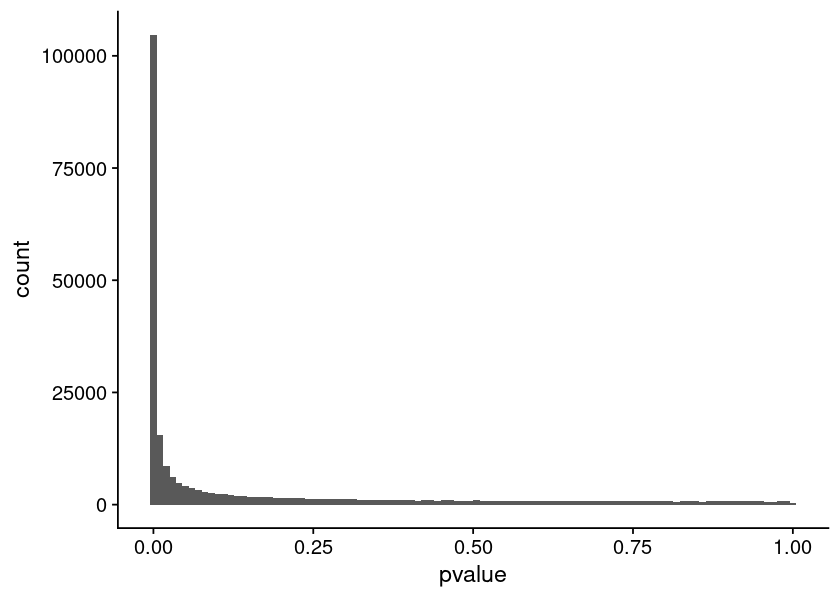

In [18]:
gpt = ggplot(dat, aes(x=pvalue)) + geom_histogram(bins = 100) + xlim(0, 0.1) + theme_cowplot()
options(repr.plot.width=7, repr.plot.height=5)
print(gpt)

Warning message:
“Removed 90315 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”


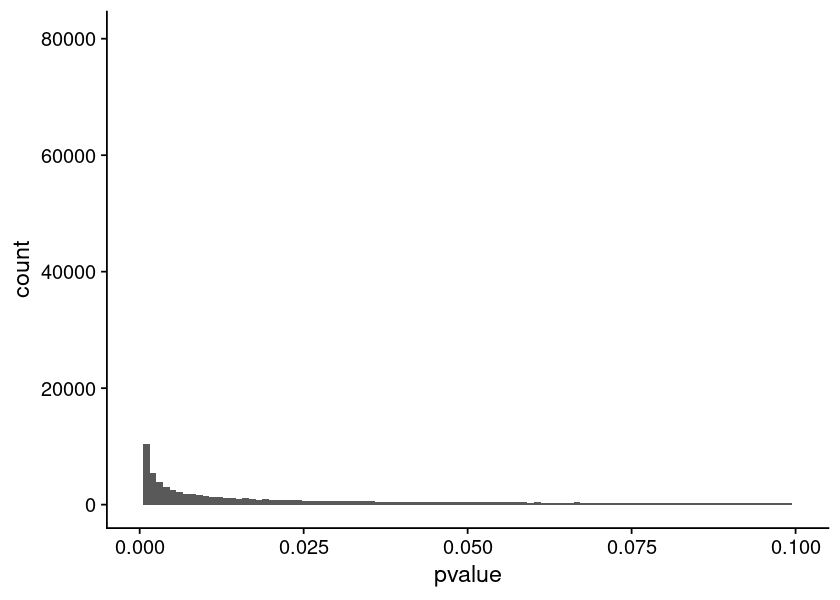

In [21]:
tmp = 
gpt = ggplot(dat, aes(x=pvalue)) + geom_histogram(bins = 100) + xlim(0, 0.1) + theme_cowplot()
options(repr.plot.width=7, repr.plot.height=5)
print(gpt)

Warning message:
“Removed 9935 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”


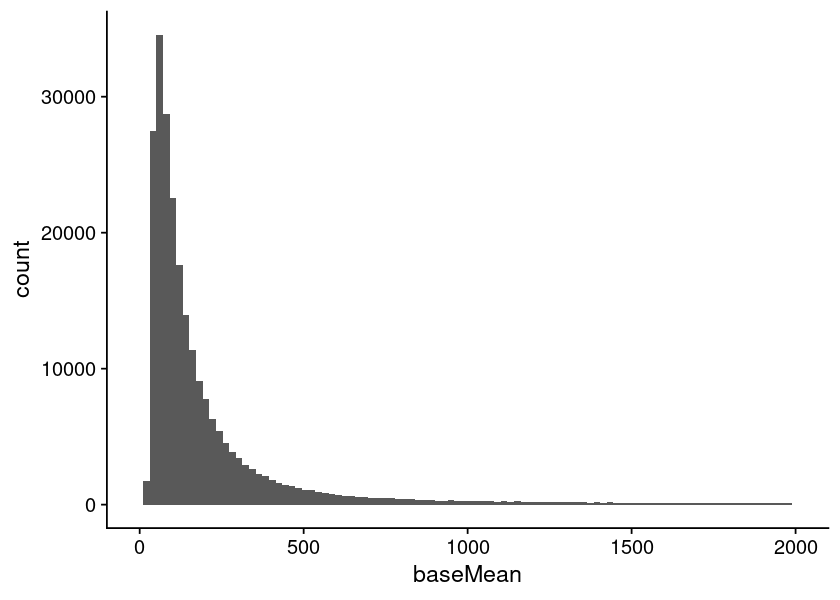

In [22]:
gpt = ggplot(dat, aes(x=baseMean)) + geom_histogram(bins = 100) + xlim(0, 2000) + theme_cowplot()
options(repr.plot.width=7, repr.plot.height=5)
print(gpt)

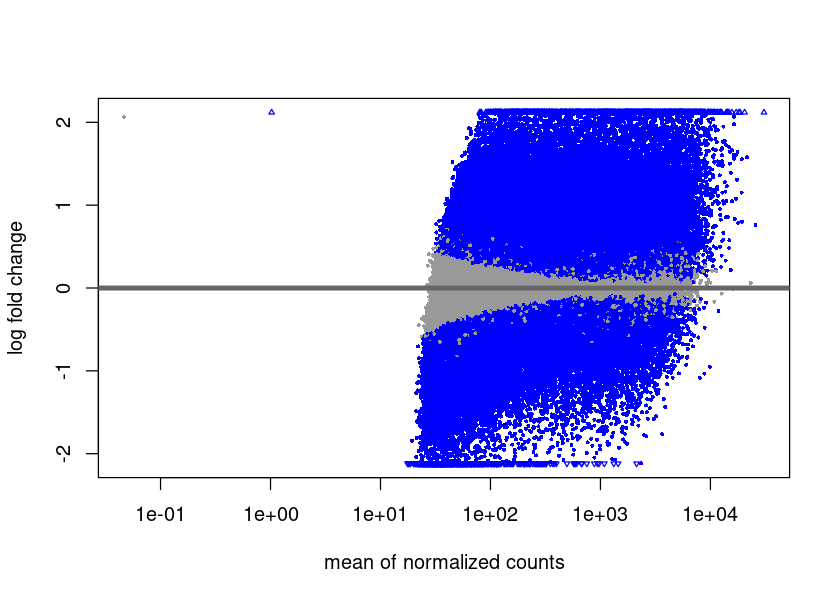

In [24]:
plotMA(res)

In [25]:
resultsNames(dds)

[1] "Intercept"                 "condition_Output_vs_Input"

In [26]:
resLFC <- lfcShrink(dds, coef='condition_Output_vs_Input', type="apeglm")
resLFC

ERROR: Error in lfcShrink(dds, coef = "condition_Output_vs_Input", type = "apeglm"): type='apeglm' requires installing the Bioconductor package 'apeglm'


In [27]:
res05 <- results(dds, alpha=0.05)
summary(res05)


out of 246852 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)       : 69473, 28%
LFC < 0 (down)     : 59898, 24%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [28]:
metadata(res)$alpha

[1] 0.1

In [29]:
metadata(res)$filterThreshold

0.2698772% 
0.04640265

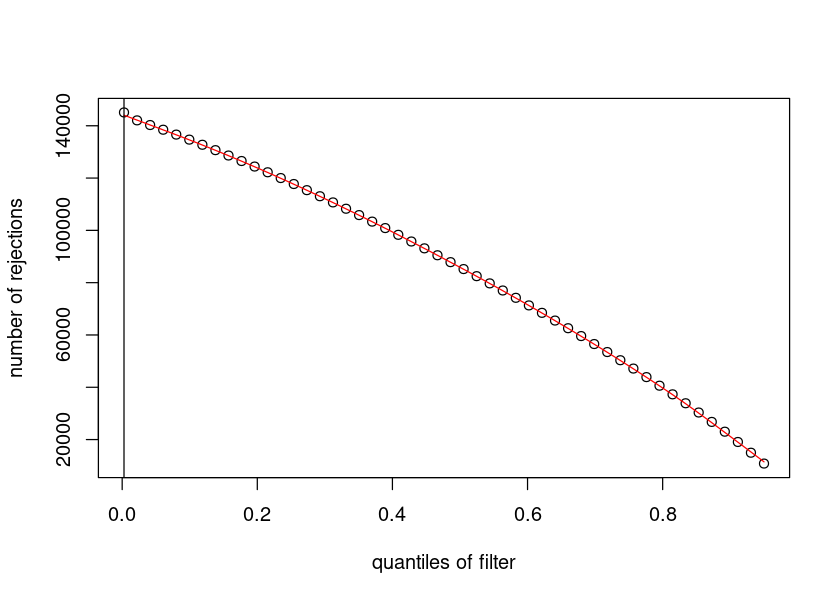

In [30]:
plot(metadata(res)$filterNumRej, 
     type="b", ylab="number of rejections",
     xlab="quantiles of filter")
lines(metadata(res)$lo.fit, col="red")
abline(v=metadata(res)$filterTheta)